<h2><font color="#004D7F" size=6>Módulo 4. Machine Learning</font></h2>

<h1><font color="#004D7F" size=5>1. Algoritmo Random Fores </font></h1>
<br>
<div style="text-align: right">
<font color="#004D7F" size=3>Luisa López Vázquez</font><br>
<font color="#004D7F" size=3>Diplomado en Ciencia de Datos</font><br>

<h3 style="color:darkred;"> Bosques Aleatorios: ¿Ingreso Alto o Bajo? </h3>
<h3> Horas trabajadas, Años de Estudio, Edad, Tipo trabajo, ...</h3> 


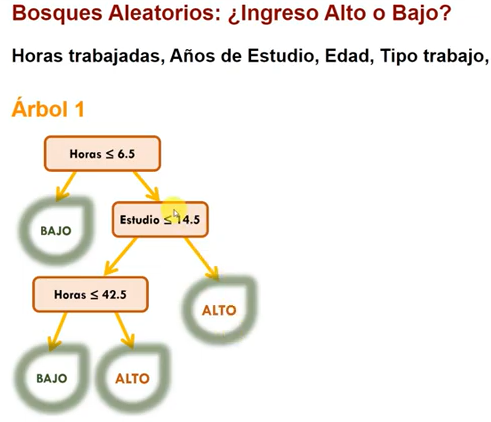

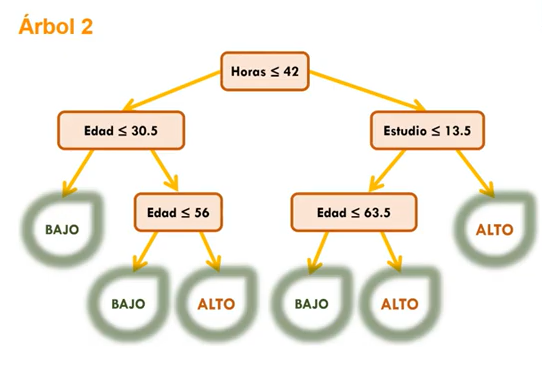

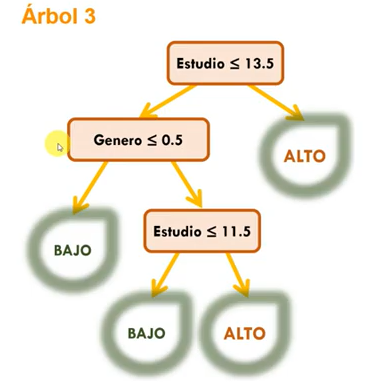

Los tres arboles podrian clasificar, sin embargo cada uno toma diferentes caracteristicas.
A que arbol le hacemos caso al 1 al 2 o al 3?

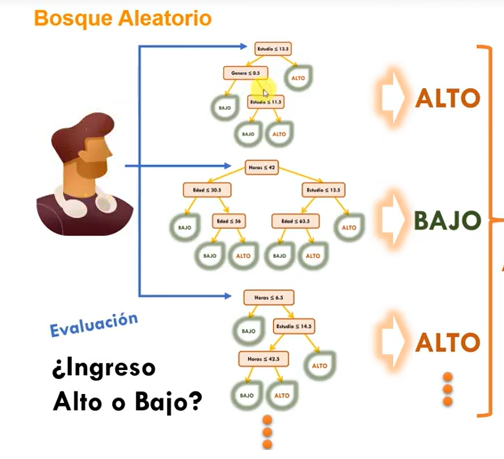

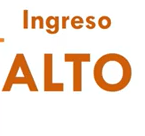

<h3 style="color:darkred;"> Aleatoriedad: </h3>
<h3 style="color:darkred;"> Muestreo con reemplazo </h>
<h3 style="color:darkblue;"> ***** max_samples ***** </h3> 

In [2]:
import pandas as pd 
personas= pd.read_csv("ingresos.csv")
print(personas.sample(frac=2/3,replace=True)) # pasamos 2/3 del total de registros
print(personas.sample(frac=2/3,replace=True))


    edad  estudio  genero  tipo_trabajo  horas  ingreso
35    19       10       0             1     30        0
81    34       10       0             1     72        0
76    27       14       0             0     40        0
95    32       13       1             0     55        1
87    32       13       1             0     45        0
..   ...      ...     ...           ...    ...      ...
17    67       16       1             0     60        1
77    19        5       1             0     40        0
37    31       10       1             0     40        0
8     68        9       1             1     25        0
26    28        9       1             0     45        1

[67 rows x 6 columns]
    edad  estudio  genero  tipo_trabajo  horas  ingreso
0     27        9       0             0     40        0
65    19       10       1             1     24        0
86    21        9       0             0     44        0
81    34       10       0             1     72        0
4     23        4       1

<h3 style="color:darkred;"> Aleatoriedad: </h3>
<h3 style="color:darkred;"> Selección de las Características para Divisiones </h3>
<h3 style="color:darkblue;"> >>>>> max_features = √num_características <<<<< </h3>

In [6]:
from random import sample
print(personas.columns[:-1],"\n") #imprimimos todas las columnas ecepto la de ingresos
print(sample(set(personas.columns[:-1]), 3)) # nos toma las columnas de forma aleatoria

Index(['edad', 'estudio', 'genero', 'tipo_trabajo', 'horas'], dtype='object') 

['edad', 'estudio', 'genero']


C:\Users\10\AppData\Local\Temp\ipykernel_10336\81224916.py:3: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  print(sample(set(personas.columns[:-1]), 3))


<h3 style="color:darkred;"> Creación de Bosque Aleatorio (Random Forest) </h3>

In [8]:
from sklearn.ensemble import RandomForestClassifier
bosque= RandomForestClassifier(
                               n_estimators=7, #cuantos arboles voy a tomar en cuenta
                               criterion="gini", # criterio de creacion del arbol
                               max_features='sqrt', # se toma la raiz del numero de caracteristicas
                               bootstrap=True, # habilita muestro aleatorio
                               max_samples=2/3, # toma dos tercios de informacion
                               oob_score=True # este parametro es una metrica especial para los bosues aleatorios
                              )
bosque.fit(personas[personas.columns[:-1]].values, personas["ingreso"].values) # le pasamos la clase ingreso ya que es un modelo supervisado

print(bosque.predict([[50,16,1,1,40]])) # prediccion

# Vamos a imprimur el accurracy
print(bosque.score(personas[personas.columns[:-1]].values, personas["ingreso"].values))
print(bosque.oob_score_)# instancias que no se usaron para crear el arbol


[1]
0.95
0.78


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


<h3 style="color:darkred;"> Visualización del Bosque Aleatorio</h3>

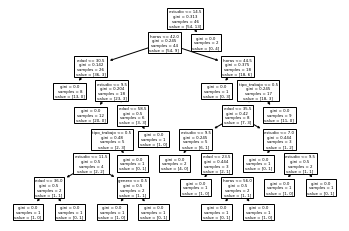

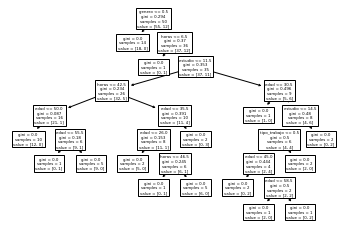

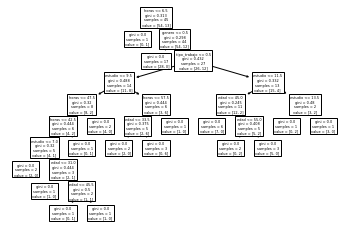

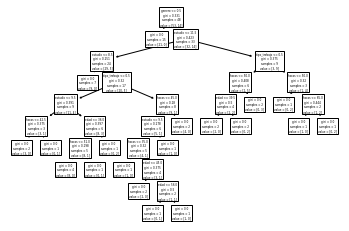

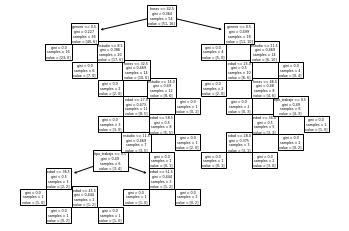

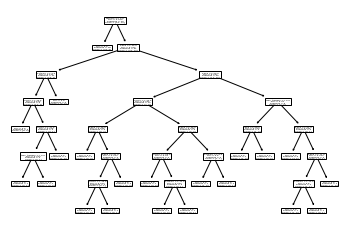

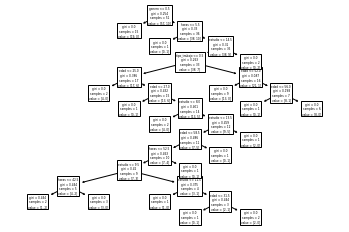

In [9]:
import matplotlib.pyplot as plt
from sklearn import tree

for arbol in bosque.estimators_:
    tree.plot_tree(arbol,feature_names=personas.columns[:-1]) # se recibe el arbol y las caracteristicas para graficas
    plt.show()